In [43]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

In [44]:
data = "./DataSets/china_gdp.csv"
df = pd.read_csv(data)

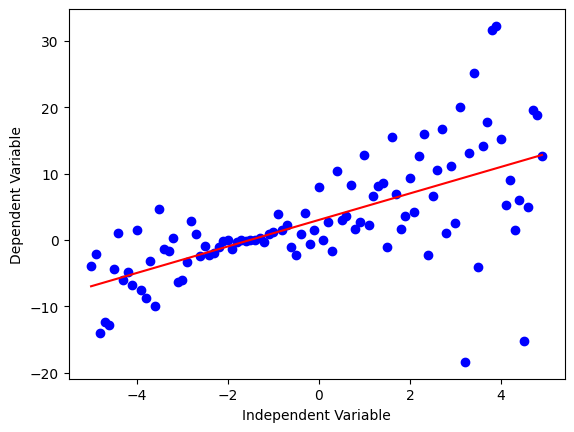

In [45]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2 * (x) + 3
y_noise = y * np.random.normal(size= x.size)
yData = y + y_noise

plt.plot(x, yData, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

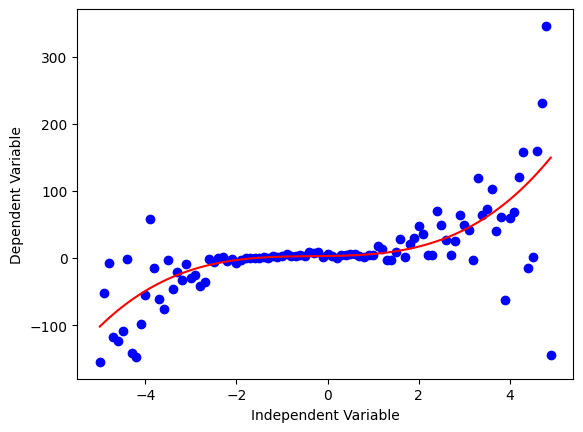

In [46]:
#Cubic
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1 * (x ** 3) + 1 * (x ** 2) + 1 * x + 3
y_noise = y * np.random.normal(size= x.size)
yData = y + y_noise

plt.plot(x, yData, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

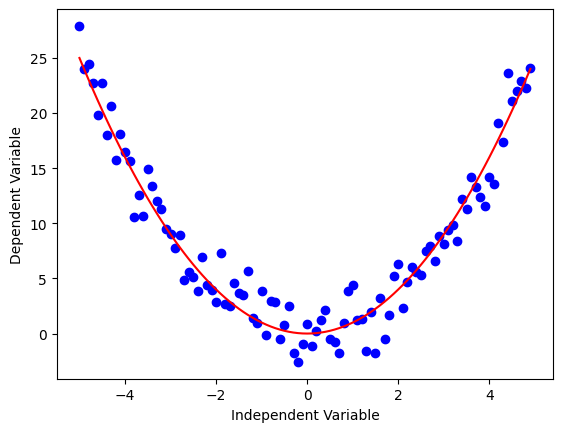

In [47]:
#Quadratic

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = np.power(x, 2)
y_noise = 2 * np.random.normal(size= x.size)
yData = y + y_noise

plt.plot(x, yData, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

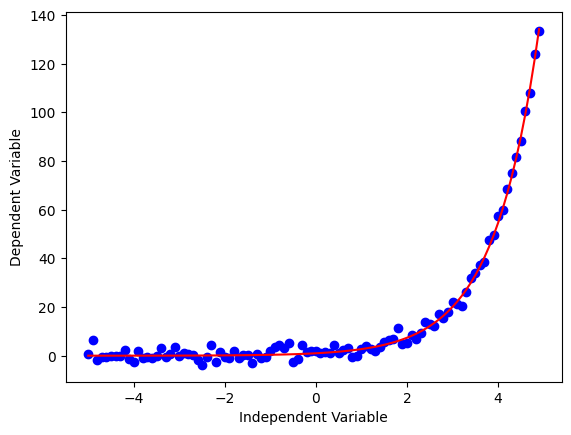

In [48]:
#Exponential

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = np.exp(x)
y_noise = 2 * np.random.normal(size= x.size)
yData = y + y_noise

plt.plot(x, yData, 'bo')
plt.plot(x, y,'r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_6024\3434945343.py:7: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


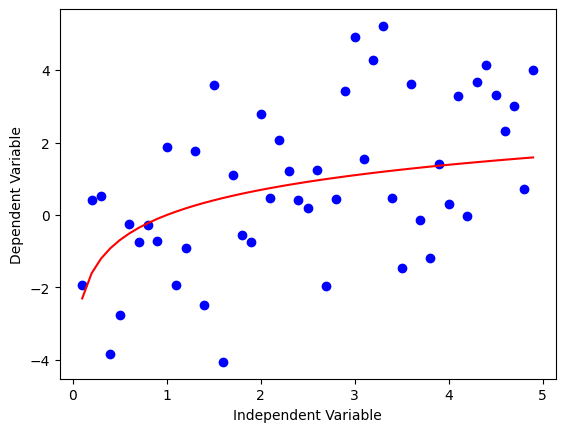

In [49]:
#Logarithmic

x = np.arange(-5.0, 5.0, 0.1)

#You can adjust the slope and intercept to verify the changes in the graph

y = np.log(x)
y_noise = 2 * np.random.normal(size= x.size)
yData = y + y_noise

plt.plot(x, yData, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

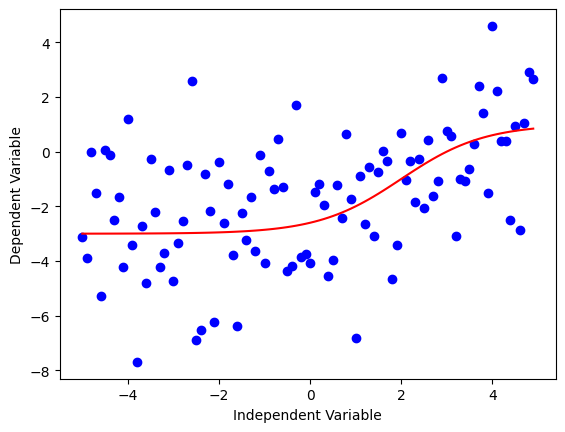

In [50]:
#Sigmoidal/Logistic

x = np.arange(-5.0, 5.0, 0.1)

#You can adjust the slope and intercept to verify the changes in the graph

y = 1 - 4 / (1 + np.power(3, x - 2))
y_noise = 2 * np.random.normal(size= x.size)
yData = y + y_noise

plt.plot(x, yData, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

In [51]:
#Example Of NonLinear Regression for China GDP

print(df.head())
print(df.tail())

   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10
    Year         Value
50  2010  6.039659e+12
51  2011  7.492432e+12
52  2012  8.461623e+12
53  2013  9.490603e+12
54  2014  1.035483e+13


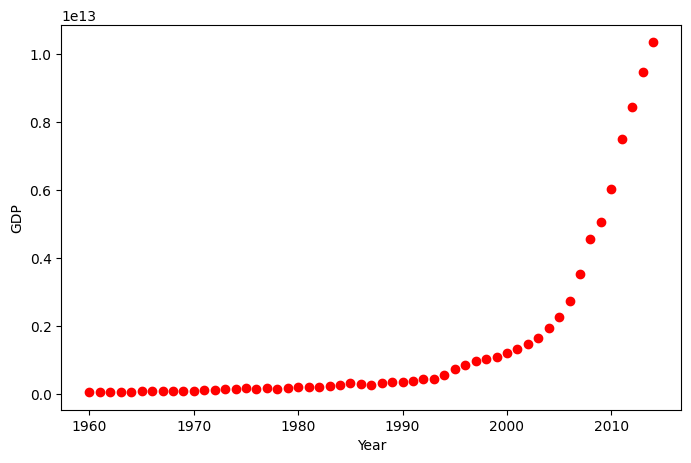

In [52]:
#Plotting The Dataset

plt.figure(figsize=(8, 5))
x_data = df['Year'].values
y_data = df['Value'].values
plt.plot(x_data, y_data, 'ro')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

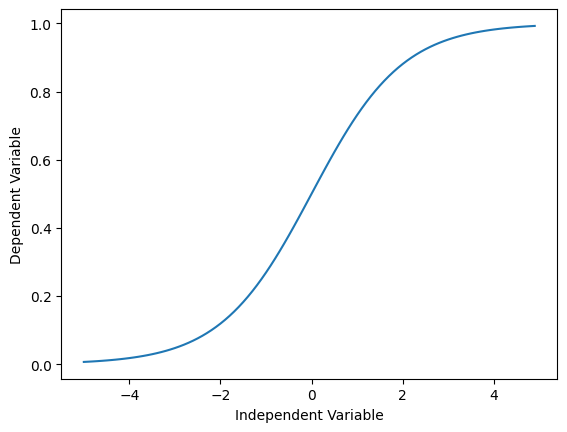

In [53]:
#Choosing a Model

x = np.arange(-5.0, 5.0, 0.1)

y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x,y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

In [54]:
#Building The Model
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

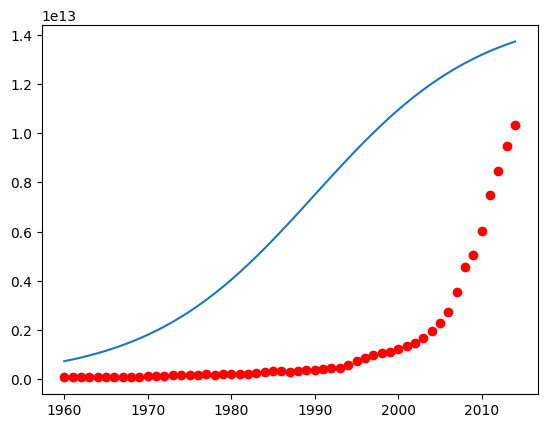

In [55]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
y_ = sigmoid(x_data, beta_1, beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, y_ * 15000000000000.)
plt.plot(x_data, y_data, 'ro')


In [56]:
#Normalized Our Data
#0-1
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

In [57]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


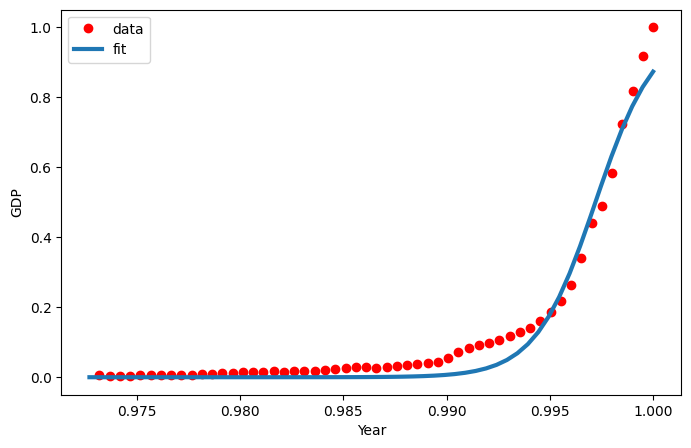

In [58]:
x = np.linspace(1960, 2015, 55)
x = x / max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [59]:
#Practice
print("R2-score: %.2f" % r2_score(ydata, y))

R2-score: 0.97
